## Loading basic Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Answer the questions below. Explain your reasoning. 

In [2]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Last Year's Polly (Anonymized)


### 👉 Question 1: Are Dhrumil's students more stressed than Irena's?

In [6]:
%%R

# read some functions from the functions.R file
source('functions.R')

In [7]:
%%R -o q_emotions

q_emotions <- read_csv('emotion.csv', show_col_types = FALSE) %>% 
        mutate(date=as.Date(date), 
        emoji = factor(emoji, levels=c('😍', '🙂', '😐', '🙁', '😢'))) 

q_emotions


# A tibble: 585 × 6
   date       user_id                          choice_id emoji question editor 
   <date>     <chr>                                <dbl> <fct> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 😍    emotion  Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         1 🙂    emotion  Dhrumil
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         2 😍    emotion  Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         1 🙂    emotion  Irena  
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         1 🙂    emotion  Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 😍    emotion  Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         2 😍    emotion  Dhrumil
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         0 😐    emotion  Dhrumil
 9 2022-05-13 89135d5c75496c9d94251f30c748b9b8        -2 😢    emotion  Irena  
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         2 😍    emotion  Dhrumil
# ℹ 575 more rows
# ℹ Use `pri

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 3 rows containing missing values (`geom_point()`). 



In addition: Warning message:
The `labeller` API has been updated. Labellers taking `variable` and `value`
arguments are now deprecated.
ℹ See labellers documentation. 


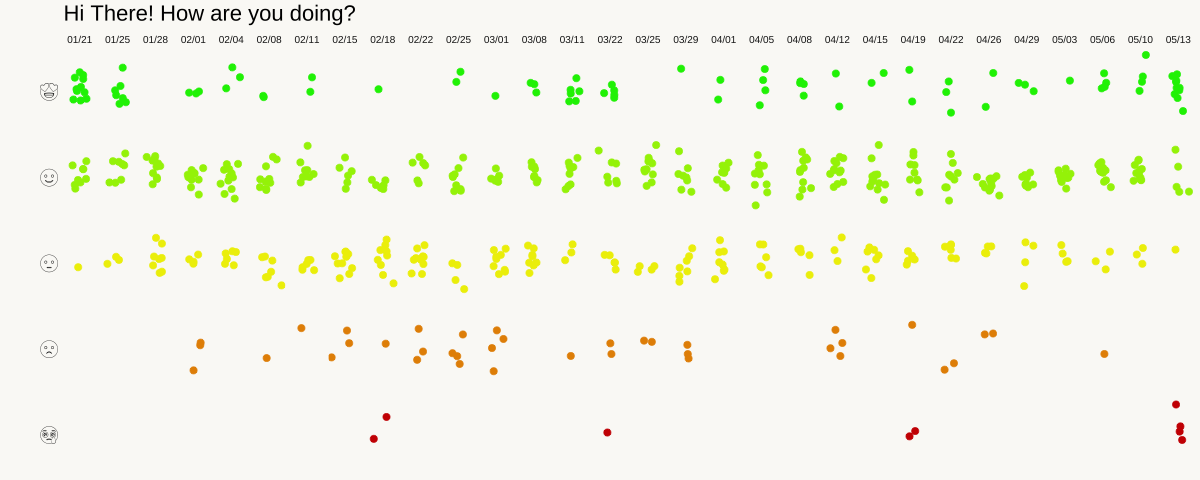

In [8]:
%%R -w 1200

plot_type_1(q_emotions)

In [9]:
q_emotions = pd.read_csv('emotion.csv', parse_dates=['date'])
q_emotions

,date,user_id,choice_id,emoji,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,2,😍,emotion,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,1,🙂,emotion,Irena
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,1,🙂,emotion,Dhrumil
...,...,...,...,...,...,...
580,2022-01-21,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
581,2022-01-21,4716f7a2eee28bddd0e115f021642950,2,😍,emotion,Dhrumil
582,2022-01-21,8b728352298677976121c9bcf5f2a578,1,🙂,emotion,Irena
583,2022-01-21,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil


In [71]:
%%R -i q_emotions

q_emotions %>% group_by(date) %>% summarise(
    mean=mean(choice_id), 
    sd=sd(choice_id),
    n=n())

# A tibble: 30 × 4
   date                 mean    sd     n
   <dttm>              <dbl> <dbl> <int>
 1 2022-01-21 00:00:00 1.48  0.602    21
 2 2022-01-25 00:00:00 1.22  0.732    18
 3 2022-01-28 00:00:00 0.579 0.507    19
 4 2022-02-01 00:00:00 0.667 0.913    21
 5 2022-02-04 00:00:00 0.857 0.655    21
 6 2022-02-08 00:00:00 0.65  0.745    20
 7 2022-02-11 00:00:00 0.667 0.767    18
 8 2022-02-15 00:00:00 0.158 0.688    19
 9 2022-02-18 00:00:00 0.15  0.988    20
10 2022-02-22 00:00:00 0.15  0.671    20
# ℹ 20 more rows
# ℹ Use `print(n = ...)` to see more rows


### 👉 Question 2: Do Dhrumil's students have a heavier workload than Irena's?

In [10]:
%%R 

q_workload <- read_csv('workload.csv', show_col_types = FALSE)
q_workload

# A tibble: 543 × 5
   date       user_id                          choice_id question editor 
   <date>     <chr>                                <dbl> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 workload Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         4 workload Irena  
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         6 workload Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         3 workload Dhrumil
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         4 workload Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 workload Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         5 workload Irena  
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         4 workload Irena  
 9 2022-05-13 a9864a7d130ce52cf17579545fc96643         5 workload Dhrumil
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         1 workload Dhrumil
# … with 533 more rows
# ℹ Use `print(n = ...)` to see more rows


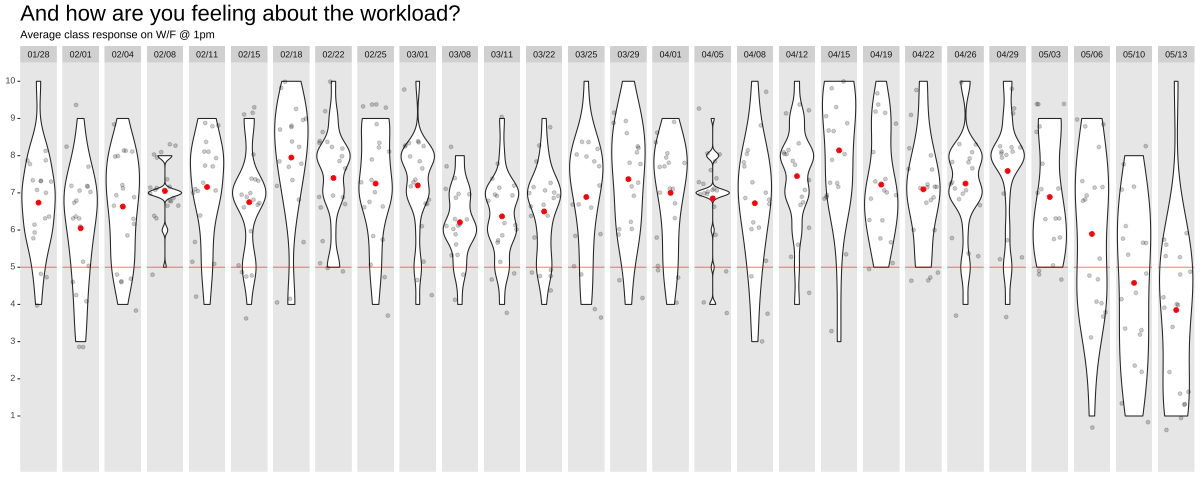

In [11]:
%%R -w 1200

# Data at a glance
plot_type_2(q_workload)

In [12]:
q_workload = pd.read_csv('workload.csv', parse_dates=['date'])
q_workload

,date,user_id,choice_id,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,workload,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,4,workload,Irena
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,6,workload,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,3,workload,Dhrumil
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,4,workload,Dhrumil
...,...,...,...,...,...
538,2022-01-28,5119dd707d353a28b41fa1adcdda76be,6,workload,Dhrumil
539,2022-01-28,b049b7eae43713e6aca6320c57b3bb88,8,workload,Irena
540,2022-01-28,5a7ac9a0ee30d1e7bedafd9046162fc7,6,workload,Irena
541,2022-01-28,2ab5e1542adfb5cbd739a0e443d7408b,5,workload,Irena


In [13]:
# hint: try a pivot table (or a group by)